# Observer Effect
**⚠️ Last two examples are not working!**

In [17]:
from qiskit import transpile
from qiskit_aer import Aer, AerSimulator, AerJob

def execute(circuits, backend=None, shots=1024, **kwargs):
    if backend is None:
        backend = AerSimulator()
        
    # Transpile the circuits for the backend
    transpiled_circuits = transpile(circuits, backend)
    
    # Run the circuits on the backend
    job = backend.run(transpiled_circuits, shots=shots, **kwargs)
    
    return job

from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit.visualization import plot_histogram

import matplotlib.pyplot as plt 
import numpy as np 
from IPython.display import display, clear_output
from math import sqrt

# A circuit without measurement

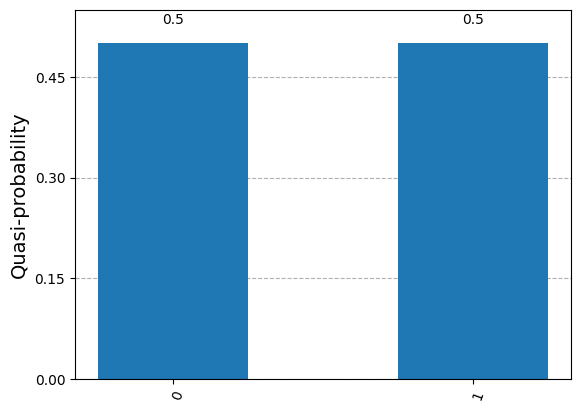

In [18]:
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)  

# Define state |Psi>
initial_state = [1/sqrt(2), 1/sqrt(2)] 

# Apply initialization operation to the qubit at position 0
qc.initialize(initial_state, 0) 

# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 

# Do the simulation, returning the result
result = execute(qc,backend).result()

# Get the data and display histogram
counts = result.get_counts()
plot_histogram(counts)

In [19]:
# Draw the circuit
print(qc.draw(output='text'))

   ┌─────────────────────────────┐
q: ┤ Initialize(0.70711,0.70711) ├
   └─────────────────────────────┘


## Circuits with Measurement

### Example 1
Observing the qubit as part of the circuit

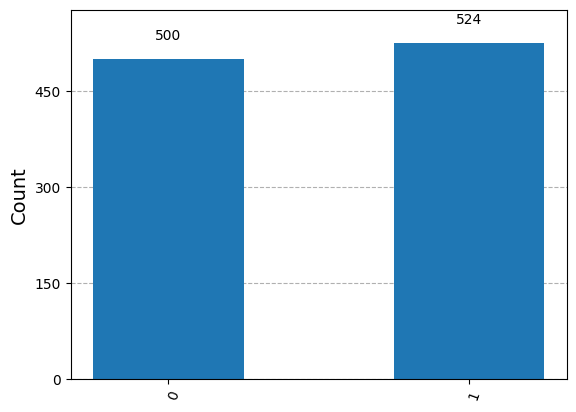

In [ ]:
qc = QuantumCircuit(1)
# Define state |Psi>

initial_state = [1/sqrt(2), 1/sqrt(2)] 
qc.initialize(initial_state, 0)
backend = Aer.get_backend('statevector_simulator') 


# observe the qubit
qc.measure_all()

# Do the simulation, returning the result
result = execute(qc,backend).result() 
counts = result.get_counts()
plot_histogram(counts)

### Example 2 - observing another qubit

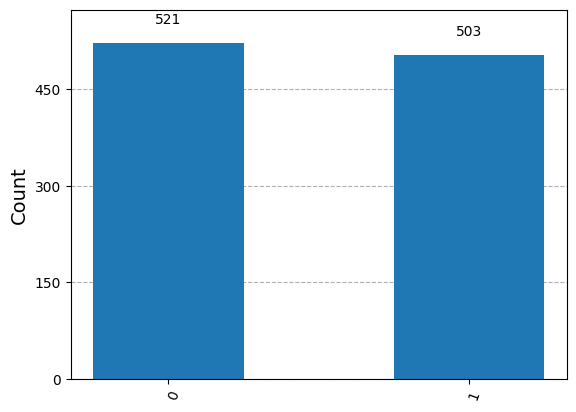

In [24]:
qc = QuantumCircuit(1) 
qc.initialize(initial_state, 0)
qc.measure_all()
result = execute(qc,backend).result()
counts = result.get_counts()
plot_histogram(counts)

In [22]:
print(qc.draw(output='text'))

        ┌─────────────────────────────┐ ░ ┌─┐
     q: ┤ Initialize(0.70711,0.70711) ├─░─┤M├
        └─────────────────────────────┘ ░ └╥┘
meas: 1/═══════════════════════════════════╩═
                                           0 
